In [23]:

import pandas as pd

file_path = '../cl_JUIN_2013-complet3.csv'  # Use '..' to go up one level

df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')

df.head()


,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

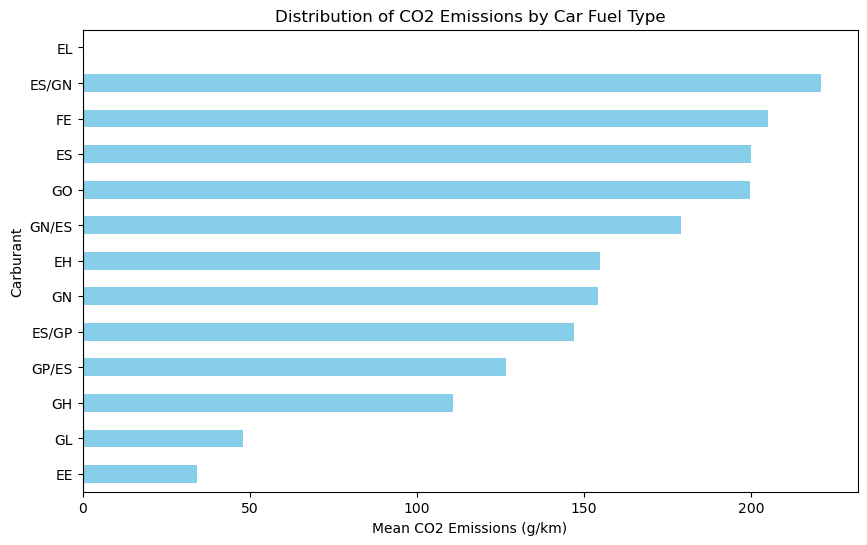

In [25]:
#Distribution of CO2 Emissions by Car Fuel Type
import matplotlib.pyplot as plt

fuel_type_co2 = df.groupby('Carburant')['CO2 (g/km)'].mean()

plt.figure(figsize=(10, 6))
fuel_type_co2.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Mean CO2 Emissions (g/km)')
plt.title('Distribution of CO2 Emissions by Car Fuel Type')
plt.show()


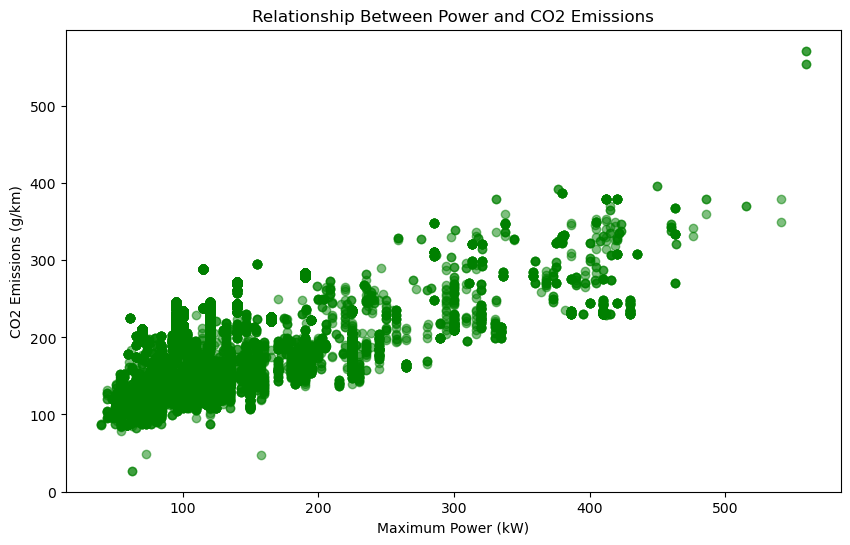

In [26]:
# Relationship Between Power and CO2 Emissions

plt.figure(figsize=(10, 6))
plt.scatter(df['Puissance maximale (kW)'], df['CO2 (g/km)'], alpha=0.5, color='green')
plt.xlabel('Maximum Power (kW)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Relationship Between Power and CO2 Emissions')
plt.show()


In [ ]:
# relationsship between Consommation mixte (l/100km) vs. CO2 (g/km)

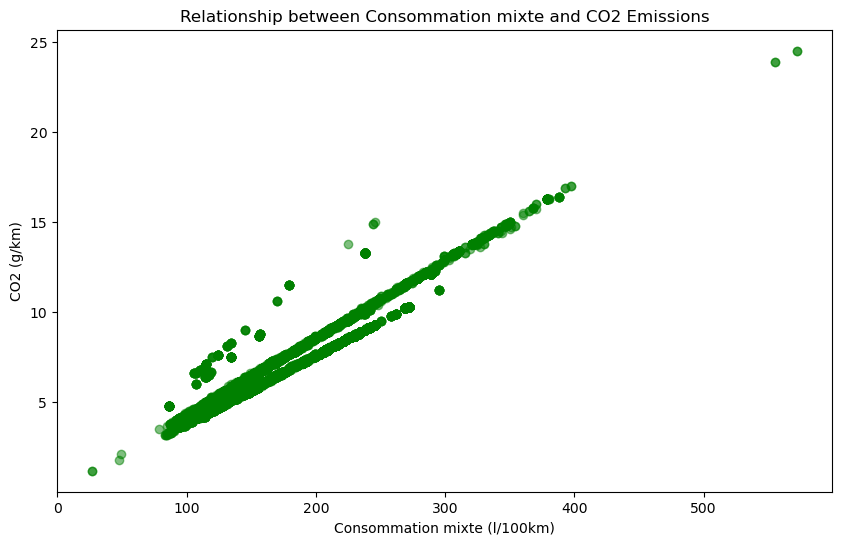

In [27]:
# subset DataFrame with relevant columns

subset_df = df[['Consommation mixte (l/100km)', 'CO2 (g/km)']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(subset_df['CO2 (g/km)'], subset_df['Consommation mixte (l/100km)'],color='green', alpha=0.5)
plt.title('Relationship between Consommation mixte and CO2 Emissions')
plt.xlabel('Consommation mixte (l/100km)')
plt.ylabel('CO2 (g/km)')
#plt.grid(True)
plt.show()

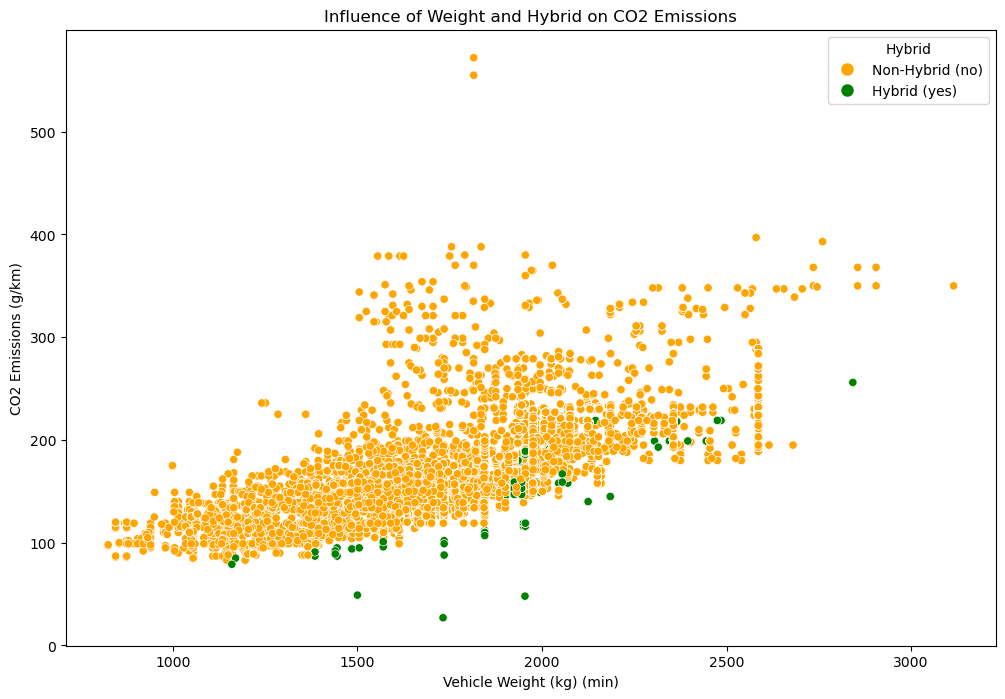

In [28]:
import seaborn as sns

# Create a scatter plot with different colors for Hybrid and Non-Hybrid
plt.figure(figsize=(12, 8))
sns.scatterplot(x='masse vide euro min (kg)', y='CO2 (g/km)', hue='Hybride', data=df, palette={'non': 'orange', 'oui': 'green'})
plt.title('Influence of Weight and Hybrid on CO2 Emissions')
plt.xlabel('Vehicle Weight (kg) (min)')
plt.ylabel('CO2 Emissions (g/km)')

legend_labels = ['Non-Hybrid (no)', 'Hybrid (yes)']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)]
plt.legend(legend_handles, legend_labels, title='Hybrid', loc='upper right')
plt.show()

In [29]:
average_co2_non_hybrid = df[df['Hybride'] == 'non']['CO2 (g/km)'].mean()
average_co2_hybrid = df[df['Hybride'] == 'oui']['CO2 (g/km)'].mean()

print(f"average_co2_non_hybrid: {average_co2_non_hybrid:.2f} g/km")
print(f"average_co2_hybrid: {average_co2_hybrid:.2f} g/km")


average_co2_non_hybrid: 199.23 g/km
average_co2_hybrid: 143.58 g/km


In [30]:
categorical_variables = [
    'Boîte de vitesse',
    'Champ V9'
]

for variable in categorical_variables:
    if df[variable].dtype == 'object':
        unique_categories = df[variable].unique()
        print(f"categore: {variable}: {list(unique_categories)}")
        print("\n")
    
quantitative_variables = [
    'Puissance maximale (kW)',
    'Consommation urbaine (l/100km)',
    'Consommation extra-urbaine (l/100km)',
    'Consommation mixte (l/100km)',
    'CO2 (g/km)',
    'CO type I (g/km)',
    'HC (g/km)',
    'NOX (g/km)',
    'HC+NOX (g/km)'
]

# Calculate descriptive statistics for each quantitative variable
for variable in quantitative_variables:
    print(f"\nStatistics for {variable}:")
    print(df[variable].describe())

categore: Boîte de vitesse: ['M 6', 'D 6', 'M 5', 'V 0', 'A 6', 'A 7', 'A 8', 'A 4', 'A 5', 'D 7', 'D 5', 'A 0', 'S 6', 'N 0', 'M 7', 'N 1']


categore: Champ V9: ['715/2007*692/2008EURO5', '715/2007*630/2012EURO5', '715/2007*630/2012EURO6', '715/2007*566/2011EURO5', '715/2007*459/2012EURO5', '715/2007*566/2011EURO6', '715/2007*459/2012EURO6', nan, '2005/55*2008/74EURO5', '715/2007*692/2008EURO6', '2005/55*2008/74EEV', '715/2007*566/2011EURO', '715/2007*459/2012EUR', '715/2007*459/2012EURO']



Statistics for Puissance maximale (kW):
count    44850.000000
mean       124.780834
std         49.158804
min         10.000000
25%        100.000000
50%        120.000000
75%        125.000000
max        559.300000
Name: Puissance maximale (kW), dtype: float64

Statistics for Consommation urbaine (l/100km):
count    44808.000000
mean         9.706744
std          2.366181
min          0.000000
25%          8.800000
50%          9.800000
75%         10.700000
max         41.100000
Name: Consomma

In [31]:
quantitative_column = 'Puissance administrative'
statistics = df[quantitative_column].describe()
print(statistics)

count    44850.000000
mean        11.018997
std          5.554475
min          1.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         81.000000
Name: Puissance administrative, dtype: float64


In [32]:
categorical_column = 'Marque'

value_counts = df[categorical_column].value_counts()

print(value_counts)


MERCEDES-BENZ                38450
VOLKSWAGEN                     900
FIAT                           607
OPEL                           586
BMW                            525
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
MAZDA                          193
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
HYUNDAI                         52
SMART                           52
LANCIA              

In [9]:
categorical_columns = ['Marque', 'Modèle dossier', 'Modèle UTAC', 'Désignation commerciale', 'CNIT', 'Type Variante Version (TVV)', 'Carburant', 'Hybride']

for column in categorical_columns:
    num_categories = df[column].nunique()
    print(f"\n{column} has {num_categories} categories.")



Marque has 51 categories.

Modèle dossier has 458 categories.

Modèle UTAC has 419 categories.

Désignation commerciale has 3582 categories.

CNIT has 44191 categories.

Type Variante Version (TVV) has 28781 categories.

Carburant has 13 categories.

Hybride has 2 categories.


In [10]:
categorical_column = 'Modèle dossier'

value_counts = df[categorical_column].value_counts()

print(value_counts)

VIANO               14031
VITO                 9890
SPRINTER             8323
CLASSE E             2849
CLASSE C             1302
                    ...  
RS 6 AVANT              1
GRANCABRIO              1
GRANCABRIO SPORT        1
GRANCABRIO MC           1
FF                      1
Name: Modèle dossier, Length: 458, dtype: int64


In [11]:
categorical_column = 'Modèle dossier'

value_counts = df[categorical_column].value_counts()

print(value_counts)

VIANO               14031
VITO                 9890
SPRINTER             8323
CLASSE E             2849
CLASSE C             1302
                    ...  
RS 6 AVANT              1
GRANCABRIO              1
GRANCABRIO SPORT        1
GRANCABRIO MC           1
FF                      1
Name: Modèle dossier, Length: 458, dtype: int64
